In [54]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket, pickle, joblib
import numpy as np
import pandas as pd
import scipy
from scipy.stats import linregress

import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))
print("【scipy】{}".format(scipy.__version__))

【日期時間】2023/04/26 21:44:49
【工作目錄】C:\Users\88690\python\Machine Learning
【主機名稱】yiyi (192.168.68.104)
【Python】3.9.12
【sklearn】1.1.1
【scipy】1.7.3


### <font color=#0000FF>Linear Regression</font>
- OLS(Ordinary Least Squares)最小平方
    - loss function : $minimize\{SSE = \sum_{i=1}^n(y_i-\hat y_i)^2\}$
- model function
    - $y = \beta_0 + \beta_1 x_1 + \epsilon$
        - $y$ : 反應變數(又稱為應變項)
        - $x_i$ : 預測變數(又稱為自變項)
        - $\beta_0$ : 截距項(intercept)
        - $\beta_1$ : 斜率(slope)、權重(模型欲估計的參數)
        - $\hat y = \hat \beta_0 + \hat \beta_1 x_1$        
            - $\hat y、 \hat \beta_0、 \hat \beta_1$ : 被算(預測)出來的估計值(頭頂上多一頂帽子^)
    - $y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \epsilon$

In [4]:
fname1 = r"C:\Data\PyMLData\cars.csv"
fname2 = r"C:\Data\PyMLData\mtcars.csv"

cars = pd.read_csv(fname1, sep=",", engine="python", encoding="cp950")
mtcars = pd.read_csv(fname2, sep=",", engine="python", encoding="cp950")

In [158]:
# summary data function
def summary_data(dataset, dataname=""):
    """
    ----------
    Description 
    ----------
    This function can print dataset information like
    1. records & numbers of columns
    2. column name
    3. na value
    ----------
    Parameters
    ----------
    dataset:dataframe
    dataname:str, default:""
    """
    print(f"Data Name:{dataname}")
    print("Records:{} \nColumns:{}".format(dataset.shape[0], dataset.shape[1]))
    print("Column Name:{}".format(list(dataset.columns)))
    print("----------------------")
    print("Check NA value: \n{}".format(dataset.isna().sum()))
    print("Check Total NA Value:{}".format(dataset.isna().sum().sum()))
    print("----------------------")
    print("Data type of each colnums:")
    for i in dataset.columns:
        print("{:7s}{}".format(i+":", dataset[i].dtype))

【cars資料集】
- speed : numeric Speed (mph) 速度（mph, miles per hour 英里）
- dist : numeric Stopping distance (ft) 停止距離（ft, 英尺）

In [159]:
summary_data(cars, "cars")

Data Name:cars
Records:50 
Columns:2
Column Name:['speed', 'dist']
----------------------
Check NA value: 
speed    0
dist     0
dtype: int64
Check Total NA Value:0
----------------------
Data type of each colnums:
speed: int64
dist:  int64


In [28]:
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [107]:
cars.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


### <font color=#0000FF>Exploratory Data Analysis, EDA</font>
- using plotly

In [ ]:
# import plotly
import plotly.express as px

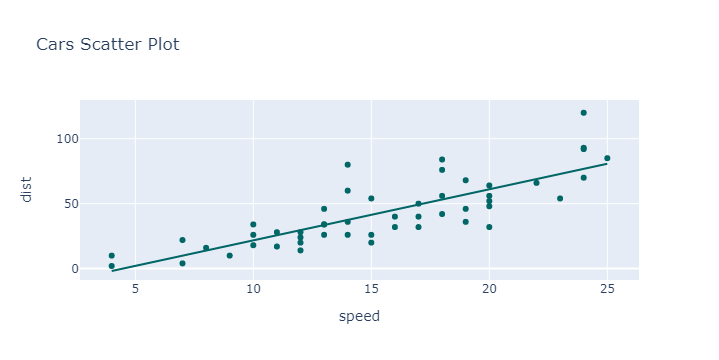

In [52]:
fig = px.scatter(cars, x="speed", y="dist", #color="dist", input colnames
                 trendline="ols", title="Cars Scatter Plot")
fig.update_traces(marker=dict(color='#006666')) #change scatter color
fig.show()

### <font color=#FF0000>Simple Regression</font>
#### Process
1. Data to array
2. Slice dataset to tarining/test dataset
3. Build linear model
4. Fit and Training
5. Check $R^2$ 
6. Prediction
7. Validation
8. Check Regression Metrics

In [106]:
#------- column to ndarray ---------
X = cars["speed"].to_numpy()
y = cars["dist"].to_numpy()

#------- slice dataset to tarining/test ---------
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,   # float : 百分比， int : 筆數
                                                    shuffle=True,    # 抽樣前是否先打亂
                                                    stratify=None,   # 依據哪一個欄位進行分層抽樣
                                                    random_state=42)

#------- build model ---------
from sklearn.linear_model import LinearRegression # LinearRegression 是一個 class
# build class 
model = LinearRegression(fit_intercept=True,
                         normalize="deprecated", # 已經廢除不用
                         copy_X=True,            # 代表傳入的資料集不會被改變
                         n_jobs=-1)              # n_jobs : 代表使用的核心數:
                                                 # None代表只用1core，-1代表使用所有的cores
    
print(vars(model))    

#------- fit and training ---------
print(f"X_train shape:{X_train.shape}") # 1D (40/list in array)
print(f"X_train reshape:{X_train.reshape(-1, 1).shape}") # 
model.fit(X=X_train.reshape(-1, 1), y=y_train.reshape(-1, 1))  # 為什麼要 reshape ??

#------- R2 ---------
R2 = model.score(X=X_train.reshape(-1, 1), y=y_train.reshape(-1, 1))
print('R2 : {:.3%}'.format(R2))

#------- Linear model---------
print("y = {:.3f} + {:.3f}x".format(float(model.intercept_), float(model.coef_)))

#------- Prediction ---------
y_hat = model.predict(X=X_train.reshape(-1, 1))
print("y_hat:")
print(y_hat[:5])

#------- Check Regression Metrics ---------
print("R2:{:.3f}".format(r2_score(y_true = y_train, y_pred = y_hat)))                  # R2
print("MSE:{:.3f}".format(mean_squared_error(y_true = y_train, y_pred = y_hat)))       # MSE
print("MAE:{:.3f}".format(mean_absolute_error(y_true = y_train, y_pred = y_hat)))      # MAE

{'fit_intercept': True, 'normalize': 'deprecated', 'copy_X': True, 'n_jobs': -1, 'positive': False}
X_train shape:(40,)
X_train reshape:(40, 1)
R2 : 64.512%
y = -14.134 + 3.686x
y_hat:
[[30.09436477]
 [15.35161575]
 [55.89417557]
 [22.72299026]
 [11.66592849]]
R2:0.645
MSE:217.223
MAE:11.544


#### <font color=#0086b3>查看 $R^2$ 的值</font>

In [74]:
print(model.score(X=X_train.reshape(-1, 1), y=y_train.reshape(-1, 1)))
R2 = model.score(X=X_train.reshape(-1, 1), y=y_train.reshape(-1, 1))
print('R2 : {:.3f}'.format(R2))
print('R2 : {:.3%}'.format(R2))

0.6451246335603451
R2 : 0.645
R2 : 64.512%


#### <font color='#0086b3'>【驗證資料】</font>
- 殘差平方和 : $SSE = \sum_{i=1}^{n} (\hat y_i - y_i)^2$，就是 `_residues`
- 總變異 : $SST = \sum (y_i - \bar y)^2$
- 無法解釋的變異比例 : $\frac{SSE}{SST}$
- 判定係數(coefficient of determination) : $R^2 = 1 - \frac{SSE}{SST}$

In [ ]:
print(y_hat.shape)    # 二維
SSE = sum((y_train - y_hat.reshape(-1,))**2)   # SSE : 殘差平方和
print(SSE)
SST = sum((y_train - y_train.mean())**2)       # SST : 總變異
print(SST)
R2 = 1 - SSE/SST  
print(R2)

#### <font color='#0086b3'>使用模組內的函數，查看相關指標</font>

In [ ]:
print(r2_score(y_true = y_train, y_pred = y_hat))                  # R2
print(mean_squared_error(y_true = y_train, y_pred = y_hat))        # MSE
print(mean_absolute_error(y_true = y_train, y_pred = y_hat))       # MAE

#### <font color=#006666> Why need to reshape?</font>
<font color=red>X_train vs X_train.reshape</font>

In [71]:
print(f"X_train:{X_train[:5]}")
print(f"X_train reshape:\n{X_train.reshape(-1, 1)[:5]}")

X_train:[12  8 19 10  7]
X_train reshape:
[[12]
 [ 8]
 [19]
 [10]
 [ 7]]


### <font color=#FF0000>Complex Regression</font>
- Dataset: mtcars

【mtcars資料集】
- mpg : Miles/(US) gallon 英里/（美國）加侖
- cyl : Number of cylinders 氣缸數
- disp : Displacement (cu.in.) 位移（cu.in.）
- hp : Gross horsepower 總馬力 
- drat : Rear axle ratio 後橋比
- wt : Weight (1000 lbs) 重量（1000 lbs）
- qsec : 1/4 mile time 1/4英里時間
- vs : Engine (0 = V-shaped, 1 = straight) 引擎 (0 = V形，1 =直)
- am : Transmission (0 = automatic, 1 = manual) 傳動 (0 =自動，1 =手動)
- gear : Number of forward gears 齒輪前進檔數
- carb : Number of carburetors 碳氫化合物數量

In [160]:
summary_data(mtcars, "mtcars")

Data Name:mtcars
Records:32 
Columns:11
Column Name:['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
----------------------
Check NA value: 
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64
Check Total NA Value:0
----------------------
Data type of each colnums:
mpg:   float64
cyl:   int64
disp:  float64
hp:    int64
drat:  float64
wt:    float64
qsec:  float64
vs:    int64
am:    int64
gear:  int64
carb:  int64


In [31]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [108]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### <font color=#0000FF>Exploratory Data Analysis, EDA</font>
- using plotly

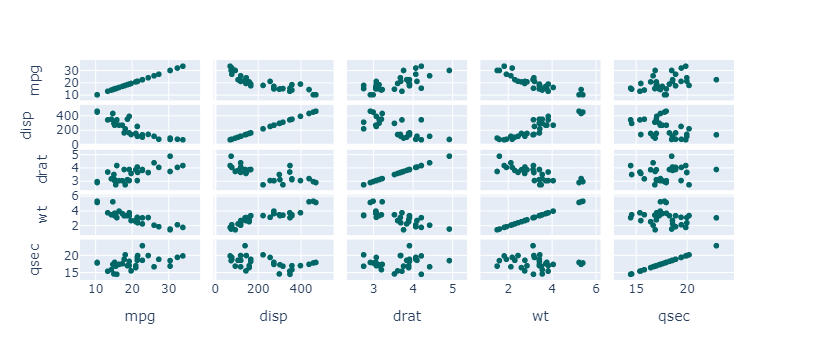

In [162]:
# 
flot_col = []
for i in mtcars.columns:
    if(mtcars[i].dtype == "float64"):
        flot_col.append(i)
        
fig = px.scatter_matrix(mtcars, dimensions=list(flot_col))
fig.update_traces(marker=dict(color='#006666')) #change scatter color
fig.show()